In [1]:
from IPython.display import Image

In [40]:
#url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
#Image(url,width=300, height=300)

In [41]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [4]:
%matplotlib inline

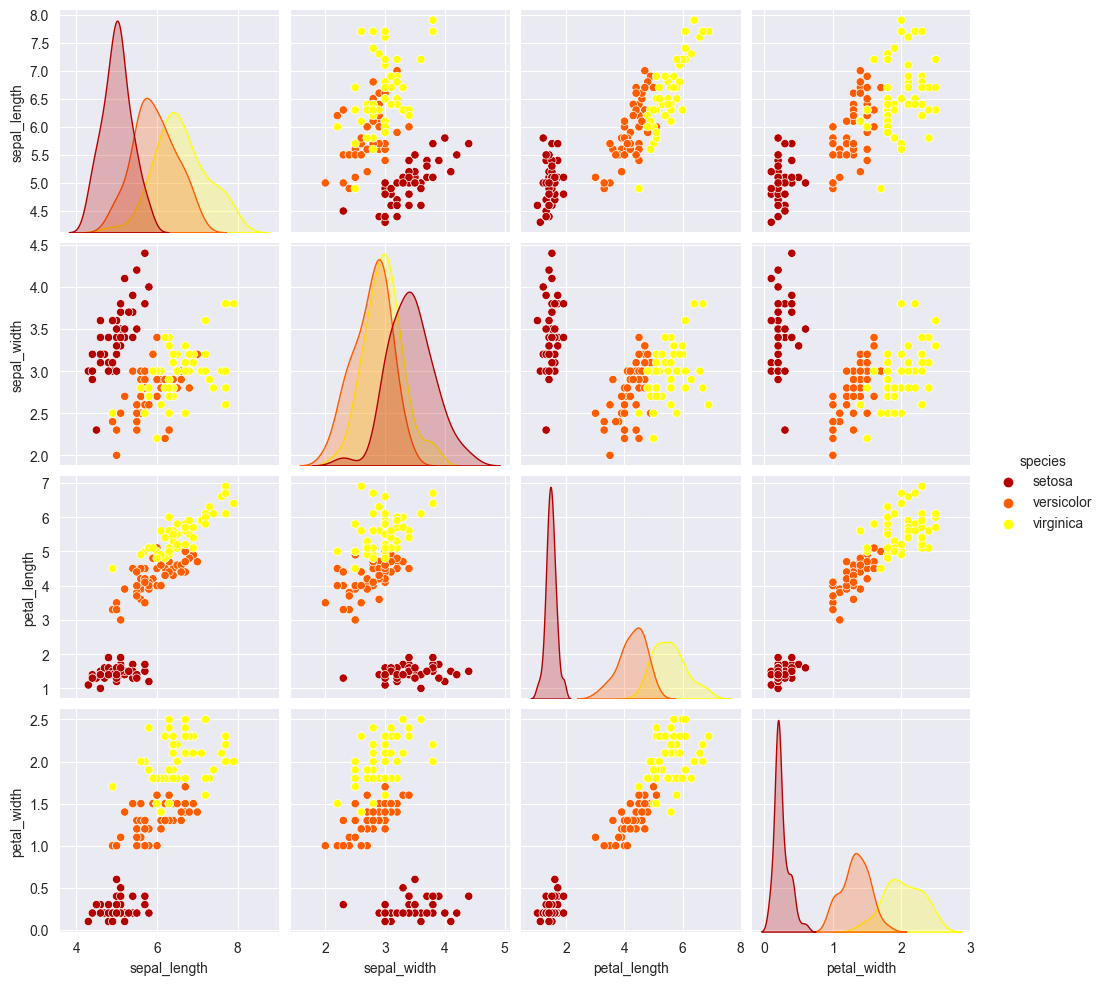

In [5]:
sns.pairplot(iris, hue='species', palette='hot')

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

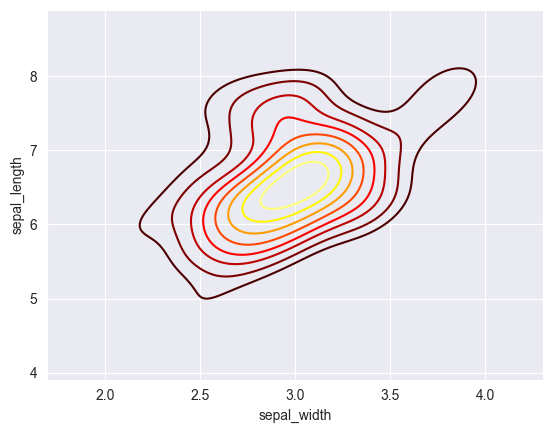

In [21]:
part_s = iris[iris['species'] == 'virginica']
sns.kdeplot(data=part_s, x=part_s['sepal_width'], y=part_s['sepal_length'], cmap="hot", fill=False, thresh=False)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()

In [28]:
svc_model.fit(X_train, y_train)

SVC()

In [30]:
predicted = svc_model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(predicted, y_test))

[[18  0  0]
 [ 0 12  2]
 [ 0  0 13]]


In [33]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.86      0.92        14
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid_param = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [36]:
grid = GridSearchCV(SVC(), grid_param, refit=True, verbose=2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [37]:
grid_predicted = grid.predict(X_test)

In [38]:
print(confusion_matrix(grid_predicted, y_test))

[[18  0  0]
 [ 0 11  1]
 [ 0  1 14]]


In [39]:
print(classification_report(grid_predicted, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.92      0.92      0.92        12
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

